<a href="https://colab.research.google.com/github/Tahira148/colab-git-assignment8/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset
df = pd.read_csv('data.csv', encoding='utf-8')

# Show shape and first few rows
print("Shape:\n", df.shape)
print("First few rows of the dataset:\n", df.head())
print("\nMissing values per column:")
print(df.isnull().sum())


Shape:
 (569, 33)
First few rows of the dataset:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  text

In [33]:
# Clean column names
df.columns = df.columns.str.strip()

# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Standardize and encode target variable safely
df['diagnosis'] = df['diagnosis'].astype(str).str.strip().str.upper()
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Drop rows where diagnosis couldn't be mapped (if any)
df = df.dropna(subset=['diagnosis'])

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Show summary info
print("\nData info:")
print(df.info())
print("\nTarget distribution:")
print(y.value_counts())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se       

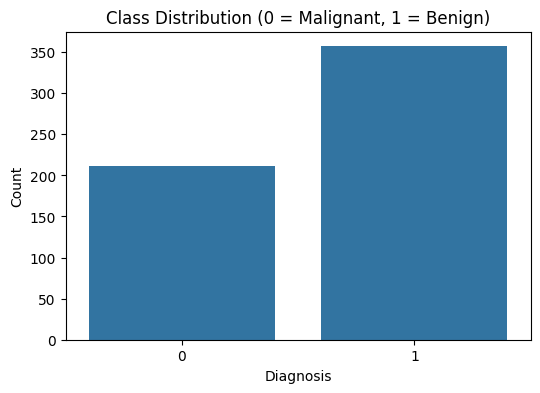

In [34]:
# Class Distribution Plot
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [35]:
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.627417    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      1.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01406

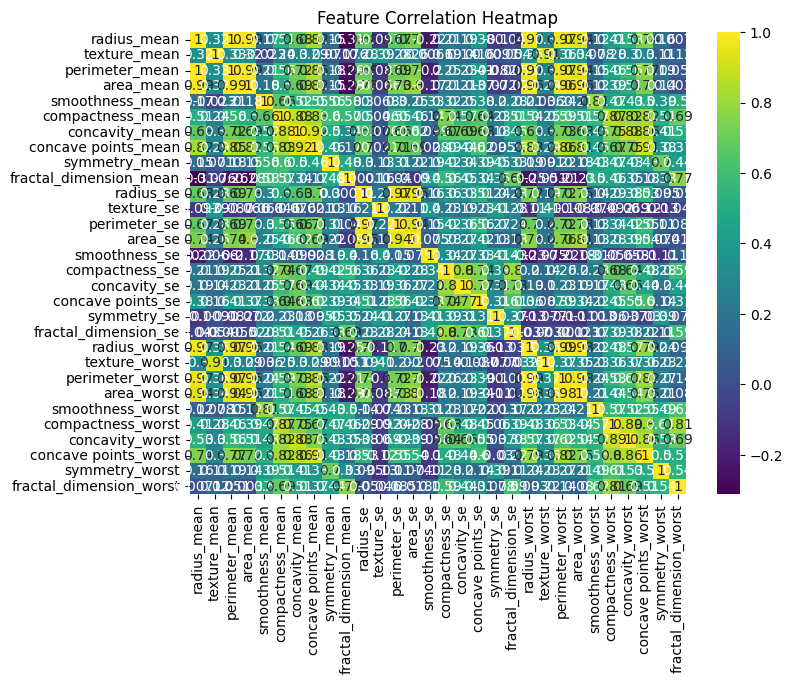

In [44]:
# Correlation Heatmap
# Shows relationships between features
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), cmap='viridis', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

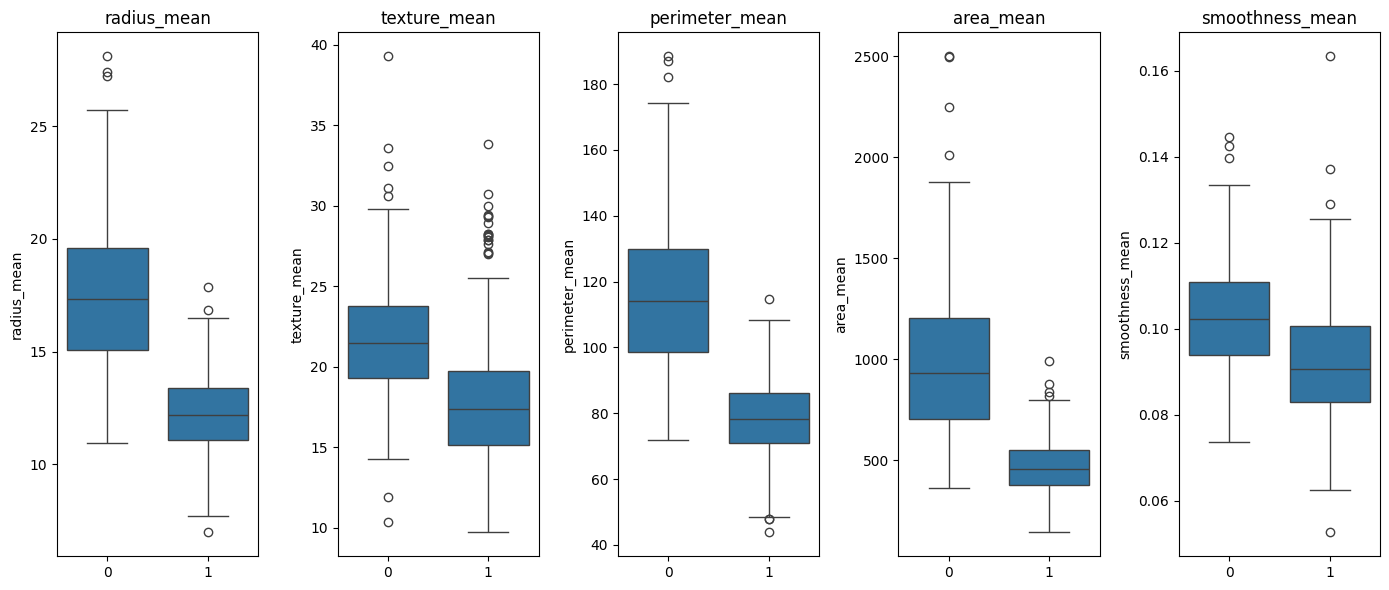

In [45]:
#  Boxplots of Key Features by Class
# Visual comparison of feature distributions by diagnosis
features_to_plot = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"]
plt.figure(figsize=(14,6))
for i, feat in enumerate(features_to_plot, 1):
    plt.subplot(1, len(features_to_plot), i)
    sns.boxplot(x=y, y=X[feat])
    plt.title(feat)
    plt.xlabel("")
plt.tight_layout()
plt.show()

In [46]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (455, 30)
Testing shape: (114, 30)


In [47]:
# Continuing with the model training

# Create pipelines
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train both models
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

# Evaluate Random Forest as example
y_pred = pipe_rf.predict(X_test)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:, 1]))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC: 0.9932208994708995


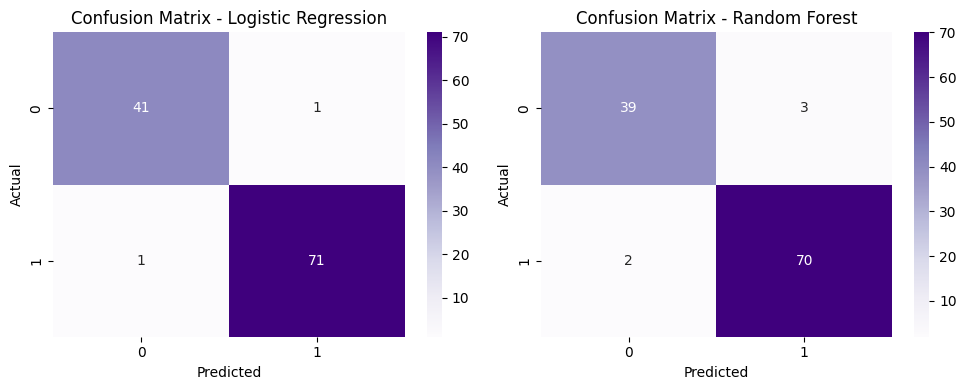

In [48]:
# Confusion Matrix
def plot_confusion_matrices_side_by_side(models, titles, X_test, y_test):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    for ax, model, title in zip(axes, models, titles):
        cm = confusion_matrix(y_test, model.predict(X_test))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=ax)
        ax.set_title(f"Confusion Matrix - {title}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

# Call the function with both models
plot_confusion_matrices_side_by_side(
    models=[pipe_lr, pipe_rf],
    titles=["Logistic Regression", "Random Forest"],
    X_test=X_test,
    y_test=y_test
)

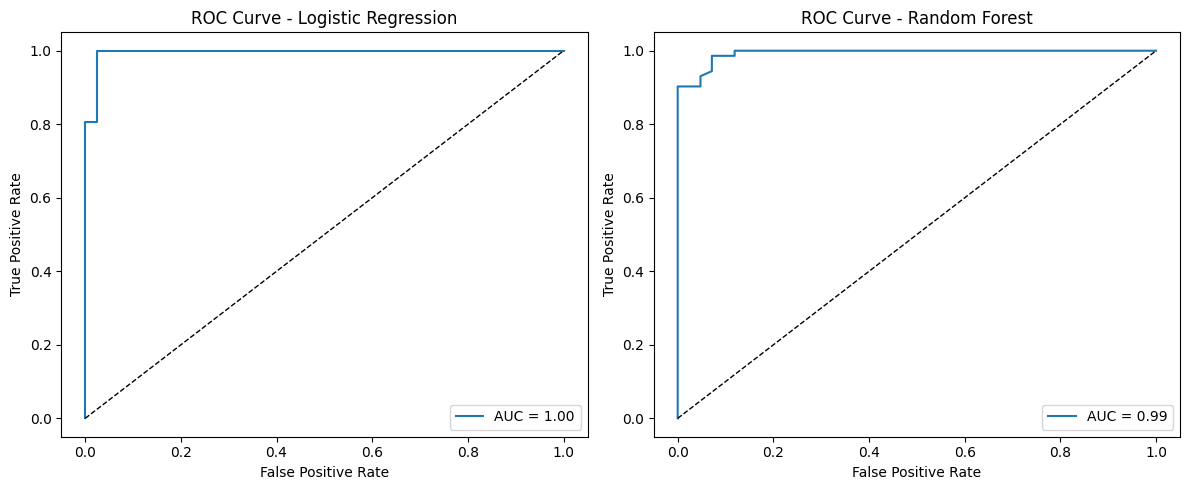

In [49]:
# ROC Curve

def plot_roc_curves_side_by_side(models, titles, X_test, y_test):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for ax, model, title in zip(axes, models, titles):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)

        ax.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
        ax.plot([0, 1], [0, 1], 'k--', linewidth=1)
        ax.set_title(f"ROC Curve - {title}")
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function with both models
plot_roc_curves_side_by_side(
    models=[pipe_lr, pipe_rf],
    titles=["Logistic Regression", "Random Forest"],
    X_test=X_test,
    y_test=y_test
)

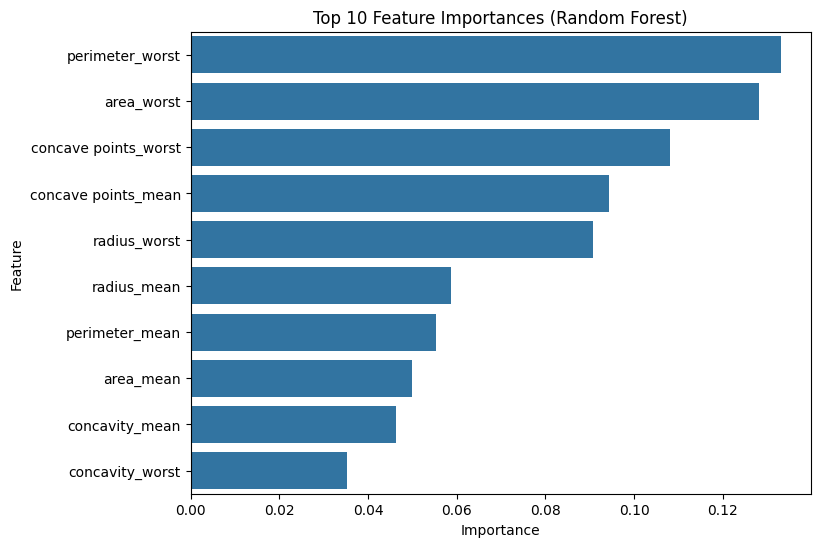

In [52]:
# Feature Importance (Random Forest)
importances = pipe_rf.named_steps["clf"].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Summary
- Dataset: Breast Cancer Wisconsin (Diagnostic)
- Models: Logistic Regression, Random Forest
- Best Model: Random Forest (ROC-AUC = 0.993)
